In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Managing Dependencies Before Get Started:

In [3]:
# check if packages are installed: open conda prompt and run:

# conda search scipy
# conda search matplotlib
# conda search seaborn
# verify package version: sea.__version__ (example using seaborn)

# installing packages:

# when you code using main env:
# conda install scipy
# or (specific version):
# conda install scipy=0.15.0

# when you code in many environments (rare):
# conda install --name myenv scipy


# Listas Úteis

In [4]:
cover         = ['CG', 'RO']
weathered     = ['FMN', 'HCT', 'ICT', 'IMN']
mn_rocks      = ['IMN', 'FMN']
fresh_clean   = ['HC', 'HF', 'IC', 'IDO', 'IF', 'IFR']
str_ore       = ['FMN', 'HCT', 'ICT', 'IMN', 'HC', 'HF', 'IC', 'IDO', 'IF', 'IFR']
ore_rocks     = str_ore + cover
carb_rocks    = ['IDO', 'DO', 'BR']
basin_rocks   = ['IC', 'IF']

teores_gl     = ['fegl', 'sigl', 'pgl', 'algl', 'mngl', 'pfgl', 'tigl', 'mggl', 'cagl']
faixas        = ['g1', 'g2', 'g3', 'g4']
param_event   = ['fegl', 'sigl', 'pgl', 'algl', 'mngl', 'pfgl', 'tigl', 'mggl', 'cagl', 'g1', 'g2', 'g3', 'g4']

not_countable = ['furo','na','de','ate','clv','clm','flx_an','flx_an_or','da_ana','da_sam','d_agru','tipo_am','global','mass_t','status']

## FORMATOS E TAMANHOS DE FIGURAS

In [5]:
chart_size= [10,10]

## FUNÇÕES DE CONVENIÊNCIA

##### FUNÇÃO DE MÉDIA PONDERADA

In [6]:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

##### FUNÇÃO PARA TRAMA MINERAL DE ITABIRITOS COMUNS LIMPOS

In [7]:
def trama_itab(fegl, sigl):
    return fegl * 1.42 + sigl

##### FUNÇÃO PARA DELETERIOS TOTAIS

In [8]:
def outros(pgl, algl, mngl, pfgl):
    return 2.29*pgl + algl + 1.29*mngl + pfgl


## Load data

In [9]:
fso = pd.read_csv('ABO-Assay-GDMS-26042021.csv', low_memory=False, na_values='-99', encoding="latin1")

## Load dummies to test resources


In [10]:
penguins=sea.load_dataset("penguins")

In [11]:
iris=sea.load_dataset("iris")

### Extracting cli fso  database content:

In [12]:
fso.CLI.unique()

array(['HF', 'IF', 'AT', 'IN', 'HC', 'IGO', 'IC', '\\N', 'IAL', 'CG',
       'IMNF', 'IMN'], dtype=object)

## Basic Exploratory Data Analysis

In [13]:
fso.describe()

,DE,ATE,COMP,FEGL,SIGL,PGL,ALGL,MNGL,MNOGL,PFGL,TIGL,MGGL,CAGL,FOGL,Fe3O4GL,KGL,NAGL,CUGL,MNO2GL,NIGL,G1,G2,G3,G4,G5,G6,G7,G8,FE1,SI1,P1,AL1,MN1,MNO1,PF1,TI1,MG1,CA1,FO1,Fe3O4_1,K1,NA1,CU1,MNO2_1,NI1,FE2,SI2,P2,AL2,MN2,MNO2,PF2,TI2,MG2,CA2,FO2,Fe3O4_2,K2,NA2,CU2,MNO2_2,NI2,FE3,SI3,P3,AL3,MN3,MNO3,PF3,TI3,MG3,CA3,FO3,Fe3O4_3,K3,NA3,CU3,MNO2_3,NI3,FE4,SI4,P4,AL4,MN4,MNO4,PF4,TI4,MG4,CA4,FO4,Fe3O4_4,K4,NA4,CU4,MNO2_4,NI4,FE5,SI5,P5,AL5,MN5,MNO5,PF5,TI5,MG5,CA5,FO5,Fe3O4_5,K5,NA5,CU5,MNO2_5,NI5,FE6,SI6,P6,AL6,MN6,MNO6,PF6,TI6,MG6,CA6,FO6,Fe3O4_6,K6,NA6,CU6,MNO2_6,NI6,FE7,SI7,P7,AL7,MN7,MNO7,PF7,TI7,MG7,CA7,FO7,Fe3O4_7,K7,NA7,CU7,MNO2_7,NI7,FE8,SI8,P8,AL8,MN8,MNO8,PF8,TI8,MG8,CA8,FO8,Fe3O4_8,K8,NA8,CU8,MNO2_8,NI8,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FGRA,NUM_SACOS,FEGLA,SIGLA,PGLA,ALGLA,MNGLA,MNOGLA,PFGLA,TIGLA,MGGLA,CAGLA,FOGLA,Fe3O4GLA,KGLA,NAGLA,CUGLA,MNO2GLA,NIGLA,HGLA,FQGLA,FQGL,STATUS
count,23099.000000,23099.000000,23099.000000,10705.00000,10705.000000,10705.000000,10705.000000,10705.000000,1103.000000,10702.000000,10470.000000,10470.000000,10470.000000,1256.000000,1732.000000,1103.000000,1103.000000,492.000000,0.0,0.0,10710.000000,10475.000000,10214.000000,7666.000000,3018.000000,0.0,0.0,0.0,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1100.000000,10692.000000,10457.000000,10457.000000,10457.000000,1253.000000,1745.000000,1100.000000,1100.000000,491.000000,0.0,0.0,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,1104.000000,10479.00000,10481.000000,10481.000000,10481.000000,1257.000000,1744.000000,1104.000000,1104.000000,493.000000,0.0,0.0,10151.000000,10151.00000,10151.000000,10151.000000,10151.000000,843.000000,10150.000000,10151.000000,10151.000000,10151.000000,996.000000,1679.000000,843.000000,843.000000,232.000000,0.0,0.0,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,843.000000,7676.000000,7441.000000,7441.000000,7441.000000,996.000000,1746.000000,843.000000,843.000000,232.000000,0.0,0.0,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,0.0,3018.000000,2783.000000,2783.000000,2783.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10692.000000,10481.000000,10151.000000,7676.000000,3018.000000,0.0,0.0,0.0,10710.000000,23099.000000,15814.000000,15814.000000,15814.000000,15471.000000,15444.000000,433.000000,15395.000000,15159.000000,15159.000000,15159.000000,1895.000000,4291.000000,1323.000000,1323.000000,294.000000,0.0,0.0,10475.000000,15814.000000,0.0,0.0
mean,81.975156,88.030662,6.055507,44.43489,31.013164,0.048511,1.488042,0.530782,0.572962,2.310193,0.075845,0.242382,0.319462,0.776982,1.262974,0.038009,0.101426,0.011534,NaN,NaN,37.466067,14.534468,8.924427,38.072476,44.558941,NaN,NaN,NaN,49.710692,22.980898,0.050748,1.521610,0.697903,0.669609,2.549054,0.068282,0.242693,0.322942,0.892610,1.354961,0.034245,0.101082,0.011894,NaN,NaN,52.503875,19.262774,0.055207,1.295513,0.712945,0.766522,2.44792,0.076299,0.233972,0.306897,0.882498,1.384628,0.035842,0.100761,0.011988,NaN,NaN,47.332874,26.89345,0.057333,1.460803,0.601105,0.711127,2.365175,0.086682,0.173035,0.220813,1.085693,1.350750,0.034947,0.101257,0.013405,NaN,NaN,38.124397,40.149662,0.043752,1.871017,0.308742,0.413832,2.112373,0.100920,0.215945,0.246000,0.590743,0.900472,0.043321,0.102159,0.012155,NaN,NaN,37.571862,41.384291,0.059122,1.897353,0.342264,NaN,2.232495,0.095656,0.047313,0.034745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.753138,99.727788,99.768072,99.671838,99.971911,NaN,NaN,NaN,100.000626,2.017447,43.118976,31.408152,0.053996,1.722102,1.048645,1.275081,2.924194,0.080711,0.281745,0.364870,0.712919,0.818960,0.134633,0.051731,0.0151

### Get a brief overview of data structure: (rown and columns)

In [14]:
fso.shape

(23099, 226)

In [15]:
fso.dtypes

PROJETO                 object
TIPO_FURO               object
Cliente                 object
FURO                    object
NA                      object
DE                     float64
ATE                    float64
COMP                   float64
TIPO                    object
CLV                     object
CLV_ORI                 object
CLM                     object
CLI                     object
FEGL                   float64
SIGL                   float64
PGL                    float64
ALGL                   float64
MNGL                   float64
MNOGL                  float64
PFGL                   float64
TIGL                   float64
MGGL                   float64
CAGL                   float64
FOGL                   float64
Fe3O4GL                float64
KGL                    float64
NAGL                   float64
CUGL                   float64
MNO2GL                 float64
NIGL                   float64
G1                     float64
G2                     float64
G3      

In [16]:
fso.columns

Index(['PROJETO', 'TIPO_FURO', 'Cliente', 'FURO', 'NA', 'DE', 'ATE', 'COMP',
       'TIPO', 'CLV',
       ...
       'CUGLA', 'MNO2GLA', 'NIGLA', 'HGLA', 'FQGLA', 'FQGL', 'STATUS',
       'Estratigrafia', 'QAQC_Status_Padrao', 'QAQC_Status_Pareada'],
      dtype='object', length=226)

In [17]:
df_gl = fso[["COMP","CLI","FEGL", "FEGLA","SIGL","G1"]]

In [18]:
df_gl.columns

Index(['COMP', 'CLI', 'FEGL', 'FEGLA', 'SIGL', 'G1'], dtype='object')

In [19]:
df_gl.head()

,COMP,CLI,FEGL,FEGLA,SIGL,G1
0,10.00,HF,68.0093,67.76,1.2970,24.2149
1,10.00,HF,67.1453,67.27,1.5015,34.0163
2,10.00,HF,62.6861,63.21,7.7310,28.3865
3,7.33,HF,66.8656,67.14,0.7574,31.7364
4,7.33,HF,66.2993,66.02,0.8501,18.3176


## Médias ponderadas por comprimento de amostra

In [20]:
FEGL_AV=df_gl.groupby("CLI").apply(wavg, "FEGL", "COMP").to_frame()
FEGL_AV.rename(columns={0: 'FEGL'},inplace=True)

In [21]:
FEGLA_AV=df_gl.groupby("CLI").apply(wavg, "FEGLA", "COMP").to_frame()
FEGLA_AV.rename(columns={0:'FEGLA'},inplace=True)

In [22]:
pd.merge(FEGL_AV, FEGLA_AV, on='CLI', how='inner')

,FEGL,FEGLA
CLI,,
AT,0.000000,0.000000
CG,57.927651,47.792483
HC,49.735567,65.409630
HF,64.150548,64.800598
IAL,59.437608,59.241265
IC,14.865509,38.503241
IF,43.913975,44.996934
IGO,58.923803,59.171347
IMN,48.050181,0.000000


## configurando padrão de cores para litologias conforme definições da gerência


In [23]:
litocolor=dict(AT= "#777777",CG= "#00AA00",HC = "#EE0000",HF = "#EE00DD",IAL = "#77AAFF",IC = "#004488", \
               IF = "#0088FF",IGO = "#7766DD", IMN = "#660099",IMNF = "#000000",IN = "#774400")

In [24]:
df_gl2=df_gl.loc[:,:].dropna(how="all", inplace=True)

<ipython-input-24-7c1be531df4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gl2=df_gl.loc[:,:].dropna(how="all", inplace=True)


In [25]:
df_gl.loc[:,"D_FEGL"]=df_gl.loc[:,"FEGLA"]-df_gl.loc[:,"FEGL"]

C:\DADOS\CONDA3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\DADOS\CONDA3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [26]:
df_gl.shape

(23099, 7)

In [27]:
df_gl.shape

(23099, 7)

In [28]:
df_gl.head()

,COMP,CLI,FEGL,FEGLA,SIGL,G1,D_FEGL
0,10.00,HF,68.0093,67.76,1.2970,24.2149,-0.2493
1,10.00,HF,67.1453,67.27,1.5015,34.0163,0.1247
2,10.00,HF,62.6861,63.21,7.7310,28.3865,0.5239
3,7.33,HF,66.8656,67.14,0.7574,31.7364,0.2744
4,7.33,HF,66.2993,66.02,0.8501,18.3176,-0.2793


In [29]:
df_gl.loc[:,"AD_FEGL"]=df_gl.loc[:,"D_FEGL"].abs()

C:\DADOS\CONDA3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\DADOS\CONDA3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [30]:
df_gl.loc[:,"TEOR"]="teor"

C:\DADOS\CONDA3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [31]:
df_gl.loc[:,"ITAB"] = df_gl.apply(lambda row:trama_itab(row['FEGL'],row['SIGL']), axis=1)

In [32]:
df_gl.head()

,COMP,CLI,FEGL,FEGLA,SIGL,G1,D_FEGL,AD_FEGL,TEOR,ITAB
0,10.00,HF,68.0093,67.76,1.2970,24.2149,-0.2493,0.2493,teor,97.870206
1,10.00,HF,67.1453,67.27,1.5015,34.0163,0.1247,0.1247,teor,96.847826
2,10.00,HF,62.6861,63.21,7.7310,28.3865,0.5239,0.5239,teor,96.745262
3,7.33,HF,66.8656,67.14,0.7574,31.7364,0.2744,0.2744,teor,95.706552
4,7.33,HF,66.2993,66.02,0.8501,18.3176,-0.2793,0.2793,teor,94.995106


In [33]:
df_gl.head()

,COMP,CLI,FEGL,FEGLA,SIGL,G1,D_FEGL,AD_FEGL,TEOR,ITAB
0,10.00,HF,68.0093,67.76,1.2970,24.2149,-0.2493,0.2493,teor,97.870206
1,10.00,HF,67.1453,67.27,1.5015,34.0163,0.1247,0.1247,teor,96.847826
2,10.00,HF,62.6861,63.21,7.7310,28.3865,0.5239,0.5239,teor,96.745262
3,7.33,HF,66.8656,67.14,0.7574,31.7364,0.2744,0.2744,teor,95.706552
4,7.33,HF,66.2993,66.02,0.8501,18.3176,-0.2793,0.2793,teor,94.995106


In [34]:
df_gl.head()

,COMP,CLI,FEGL,FEGLA,SIGL,G1,D_FEGL,AD_FEGL,TEOR,ITAB
0,10.00,HF,68.0093,67.76,1.2970,24.2149,-0.2493,0.2493,teor,97.870206
1,10.00,HF,67.1453,67.27,1.5015,34.0163,0.1247,0.1247,teor,96.847826
2,10.00,HF,62.6861,63.21,7.7310,28.3865,0.5239,0.5239,teor,96.745262
3,7.33,HF,66.8656,67.14,0.7574,31.7364,0.2744,0.2744,teor,95.706552
4,7.33,HF,66.2993,66.02,0.8501,18.3176,-0.2793,0.2793,teor,94.995106


In [35]:
#options: kernel density estimation (kde), binwidth and axis
#when you have different n for each class, try to normalize using distplot

In [36]:
df_gl.drop(df_gl[df_gl.CLI == "\\N"].index,inplace=True)

C:\DADOS\CONDA3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


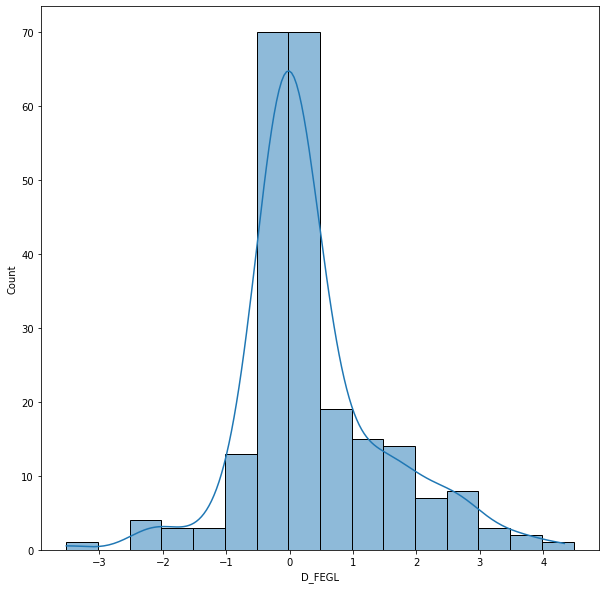

In [37]:
fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=df_gl["D_FEGL"],binwidth=0.5,kde=True)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


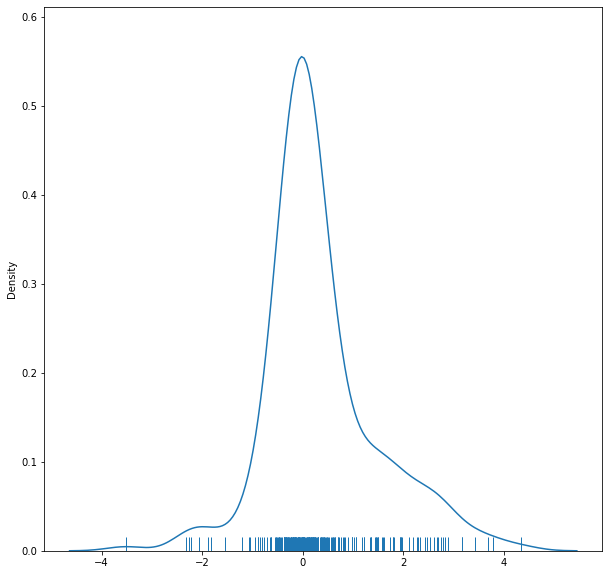

In [38]:
fig, ax = plt.subplots(figsize=chart_size)
sea.distplot(x=df_gl["D_FEGL"],kde=True,rug=True, hist=False)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


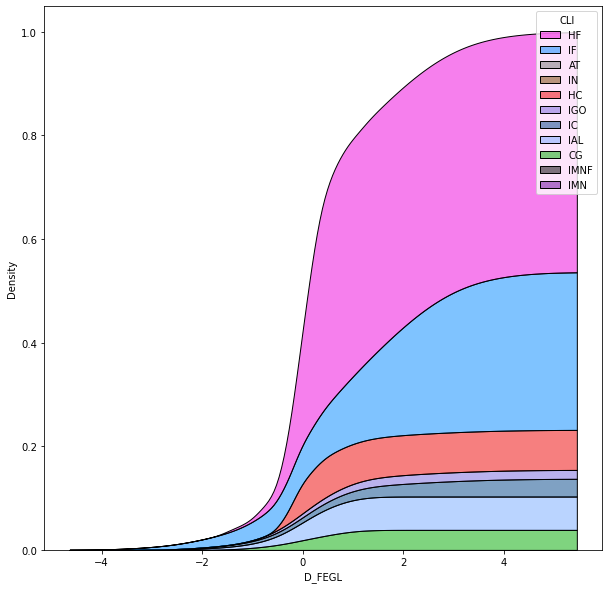

In [39]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI",multiple="stack", cumulative=True,palette=litocolor,alpha=.5)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


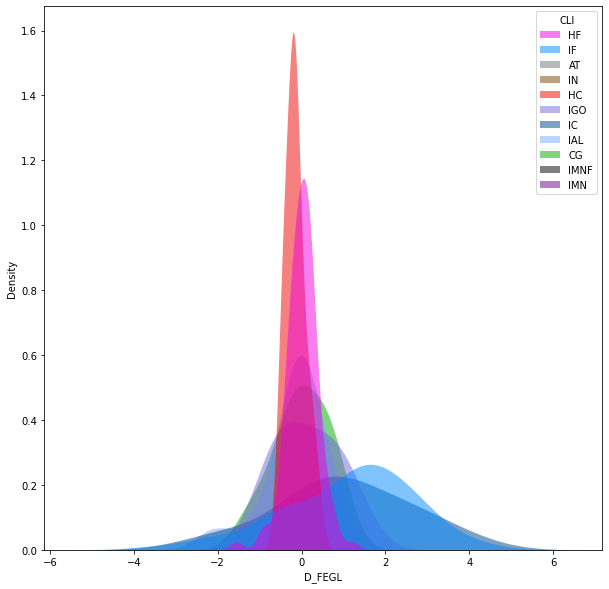

In [40]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI",fill=True, common_norm=False, palette=litocolor, alpha=.5, linewidth=0,)
fig.savefig('mean_grade_error_by_lito_fill.jpeg', transparent=None)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


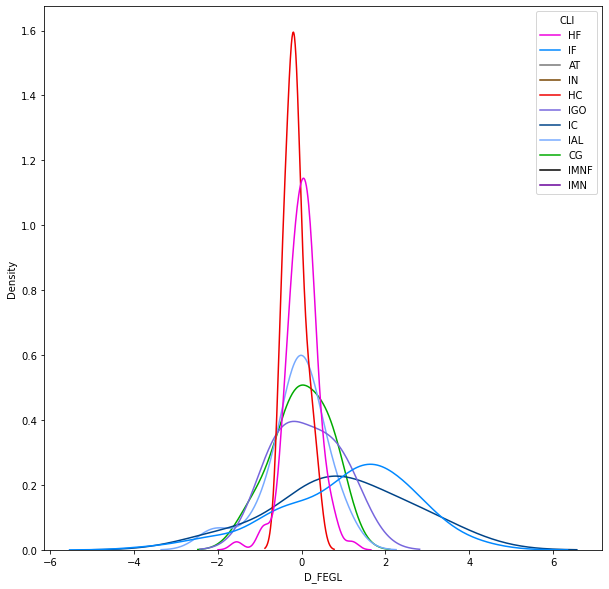

In [41]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('meangrade_error_by_lito.jpeg', transparent=None)
plt.show()

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


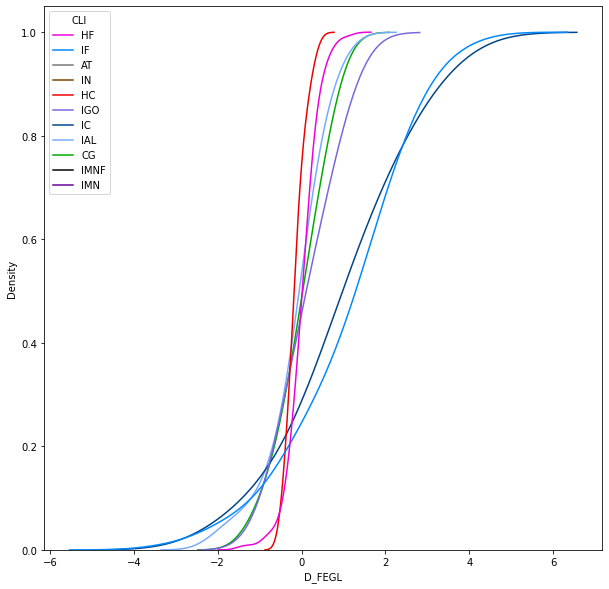

In [42]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI", common_norm=False, cumulative=True,palette=litocolor, alpha=.5)
fig.savefig('meangrade_error_by_lito.jpeg', transparent=None)
plt.show()

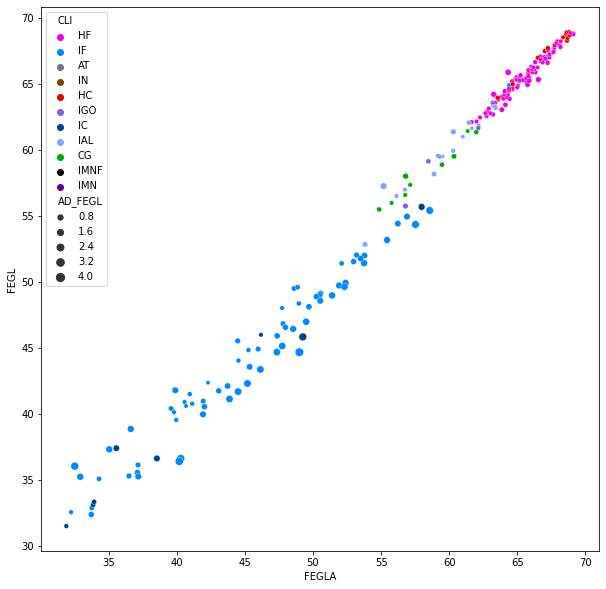

In [43]:
fig, ax = plt.subplots(figsize=chart_size)
sea.scatterplot(data=df_gl, x="FEGLA", y="FEGL", hue="CLI",palette=litocolor, size="AD_FEGL", alpha=1)
fig.savefig('mean_grade_fegl_scatter.jpeg', transparent=None)
plt.show()

## Verificando sensibilidade de erro em função do retido na primeira malha

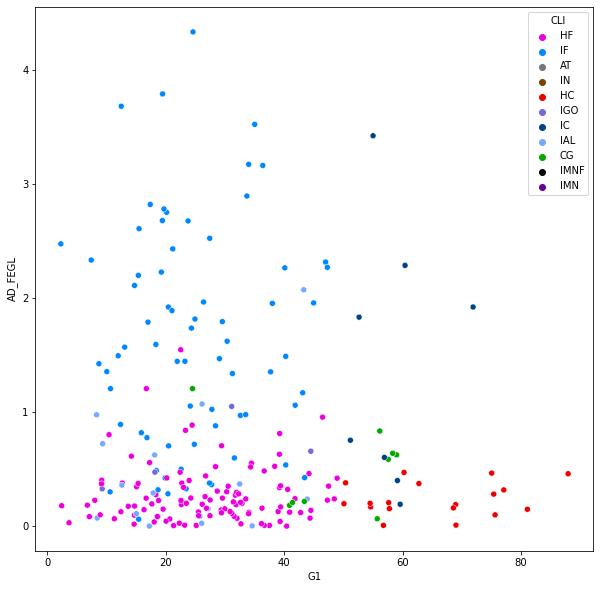

In [44]:
fig, ax = plt.subplots(figsize=chart_size)
sea.scatterplot(data=df_gl, x="G1", y="AD_FEGL", hue="CLI",palette=litocolor)
fig.savefig('coarse_split_fegl_error.jpeg', transparent=None)
plt.show()

CLI
HC    AxesSubplot(0.125,0.125;0.775x0.755)
HF    AxesSubplot(0.125,0.125;0.775x0.755)
IC    AxesSubplot(0.125,0.125;0.775x0.755)
IF    AxesSubplot(0.125,0.125;0.775x0.755)
Name: D_FEGL, dtype: object

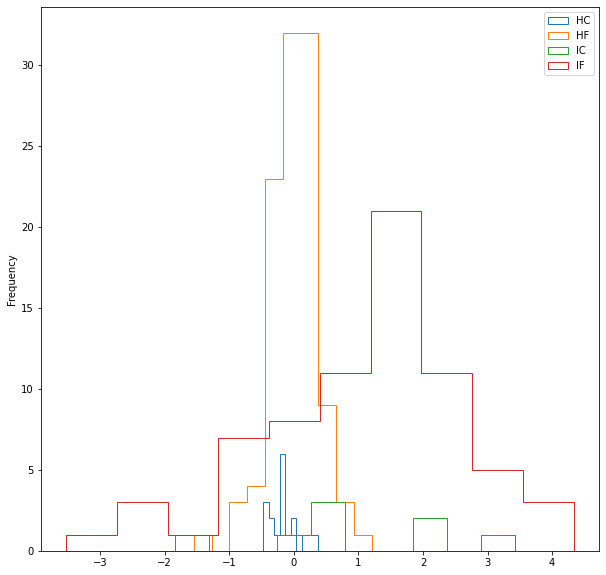

In [45]:
df_gl[(df_gl['CLI'].isin(fresh_clean)) & (df_gl['FEGLA']>=0.01)].groupby(['CLI']).D_FEGL.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=10, figsize=(10,10), legend=True)

In [46]:

sea.set_theme(style="whitegrid")

In [47]:
delta=pd.melt(df_gl, "CLI", var_name="D_FEGL")
delta.head()

,CLI,D_FEGL,value
0,HF,COMP,10
1,HF,COMP,10
2,HF,COMP,10
3,HF,COMP,7.33
4,HF,COMP,7.33


In [48]:
# Show the conditional means


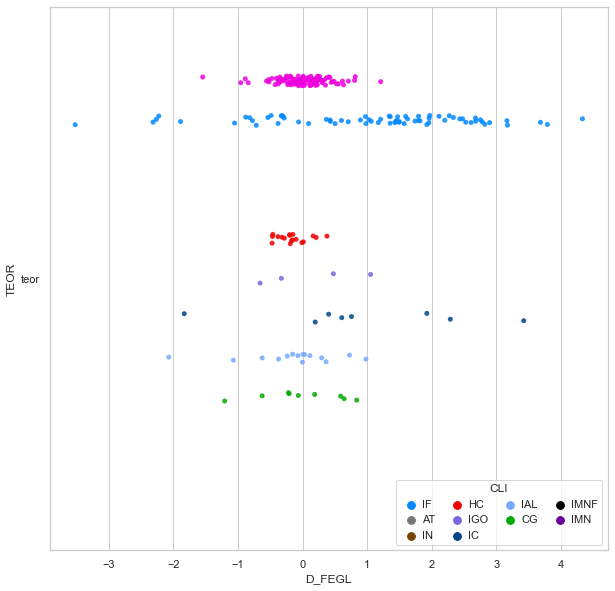

In [50]:
fig, ax = plt.subplots(figsize=chart_size)

# Show the conditional means
#sea.pointplot(x="value", y="measurement", hue="species",
#              data=iris, dodge=.532, join=False, palette="dark",
#              markers="d", scale=.75, ci=None)


sea.stripplot(x="D_FEGL", y="TEOR",hue="CLI", data=df_gl, dodge=True, alpha=0.85, zorder=1, palette=litocolor )


#sea.pointplot(x="D_FEGL", y="TEOR", hue="CLI",
#              data=df_gl, dodge=0.5, join=False, palette=litocolor,
#              scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], labels[1:], title="CLI",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=4, frameon=True)

## ISOLANDO SISTEMA QUARTZO HEM

In [51]:
df_gl.head()

,COMP,CLI,FEGL,FEGLA,SIGL,G1,D_FEGL,AD_FEGL,TEOR,ITAB
0,10.00,HF,68.0093,67.76,1.2970,24.2149,-0.2493,0.2493,teor,97.870206
1,10.00,HF,67.1453,67.27,1.5015,34.0163,0.1247,0.1247,teor,96.847826
2,10.00,HF,62.6861,63.21,7.7310,28.3865,0.5239,0.5239,teor,96.745262
3,7.33,HF,66.8656,67.14,0.7574,31.7364,0.2744,0.2744,teor,95.706552
4,7.33,HF,66.2993,66.02,0.8501,18.3176,-0.2793,0.2793,teor,94.995106


C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


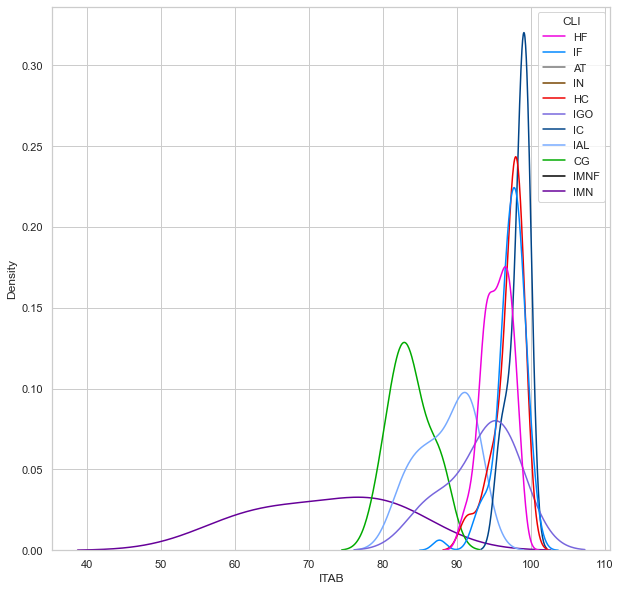

In [52]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="ITAB",hue="CLI", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('sist_quartz_hem.jpeg', transparent=None)
plt.show()

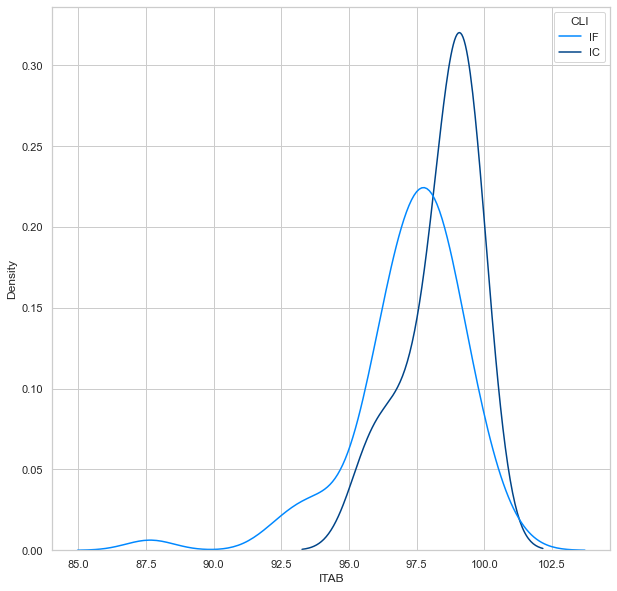

In [53]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl[df_gl["CLI"].isin(["IC","IF"])],x="ITAB",hue="CLI", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('sist_quartz_hem.jpeg', transparent=None)
plt.show()

In [89]:
dffe = fso[["CLI","FEGL","FE1","FE2", "FE3","FE4"]]

In [90]:
dffe.head()

,CLI,FEGL,FE1,FE2,FE3,FE4
0,HF,68.0093,67.90,68.97,66.97,67.69
1,HF,67.1453,67.84,68.21,64.10,66.08
2,HF,62.6861,68.42,68.15,64.73,54.12
3,HF,66.8656,65.52,67.56,67.54,67.44
4,HF,66.2993,61.05,66.73,64.65,67.93


## ESTUDANDO DIFERENCIAIS GRANULOQUÍMICOS E POTENCIAS GEOMETALÚRGICOS

## PRODUZINDO SUBSET PARA IC

In [91]:
dfplt_icfe=dffe[dffe["CLI"].isin(["IC"])]


#### Testando

In [92]:
dfplt_icfe

,CLI,FEGL,FE1,FE2,FE3,FE4
29,IC,NaN,NaN,NaN,NaN,NaN
30,IC,NaN,NaN,NaN,NaN,NaN
34,IC,55.6833,66.20,64.33,50.24,24.91
42,IC,NaN,NaN,NaN,NaN,NaN
77,IC,37.3934,39.43,49.03,52.72,26.99
87,IC,45.8543,49.95,60.51,59.09,33.59
105,IC,33.1043,41.40,48.97,30.08,14.81
106,IC,31.4877,35.15,49.36,23.09,17.81
120,IC,NaN,NaN,NaN,NaN,NaN
140,IC,NaN,NaN,NaN,NaN,NaN


In [77]:
dfplt.dropna(how='all', inplace=True)

NameError: name 'dfplt' is not defined

<AxesSubplot:>

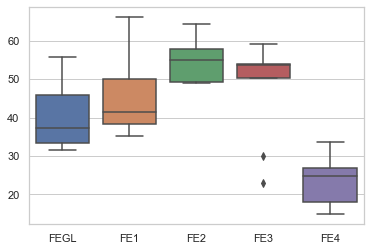

In [93]:
sea.boxplot(data=dfplt_icfe)

<AxesSubplot:ylabel='Density'>

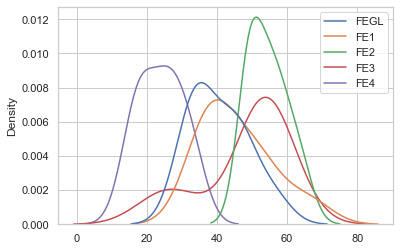

In [94]:
sea.kdeplot(data=dfplt_icfe)

In [88]:
sea.distplot(data=dfplt_icfe, kde=True)

TypeError: distplot() got an unexpected keyword argument 'data'

In [95]:
dfplt_iffe=dffe[dffe["CLI"].isin(["IF"])]

<AxesSubplot:>

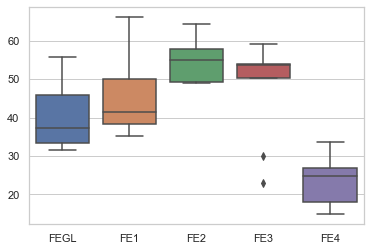

In [96]:
sea.boxplot(data=dfplt_icfe)

<AxesSubplot:ylabel='Density'>

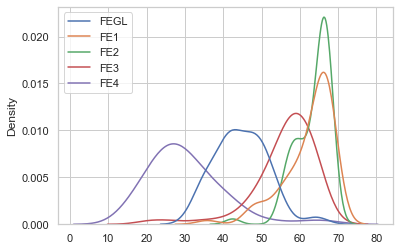

In [97]:
sea.kdeplot(data=dfplt_iffe)

In [83]:
dfplt_imnfe=dffe[dffe["CLI"].isin(["IMN"])]

<AxesSubplot:>

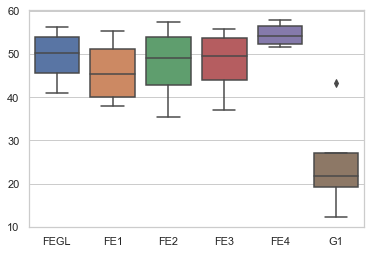

In [84]:
sea.boxplot(data=dfplt_imnfe)

<AxesSubplot:ylabel='Density'>

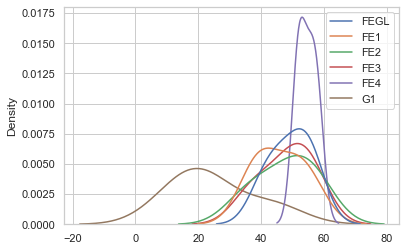

In [85]:
sea.kdeplot(data=dfplt_imnfe)

In [98]:
dfplt_hcfe=dffe[dffe["CLI"].isin(["HC"])]

<AxesSubplot:ylabel='Density'>

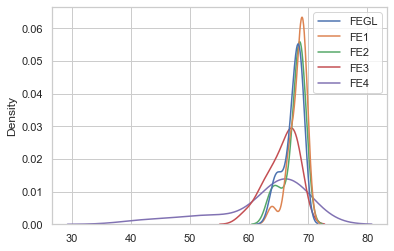

In [99]:
sea.kdeplot(data=dfplt_hcfe)

In [100]:
dfplt_hffe=dffe[dffe["CLI"].isin(["HF"])]

<AxesSubplot:ylabel='Density'>

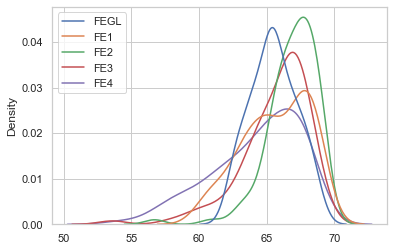

In [101]:
sea.kdeplot(data=dfplt_hffe)

In [ ]:
sea.kdeplot(data=dfplt,x=['FEGL','FE1','FE2','FE3','FE4'],hue="CLI", common_norm=False, palette=litocolor, alpha=.5)

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=dffe_valid,x="FEGL",  alpha=.5)
fig.savefig('FE_SEGREG.jpeg', transparent=None)

In [ ]:
#import seaborn as sns
sea.set_theme(style="white")

# Load the example mpg dataset
mpg = sea.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sea.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)


mpg.head()

In [ ]:
sea.set_theme(style="whitegrid")
iris = sea.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sea.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sea.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sea.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

In [ ]:
df_fe = fso[["COMP","CLI","FEGL", "FE1","fe2","G1"]]

## Getting an Event Plot to Show Data Available

### Extract Subset From cli to g4:

In [ ]:
df_event = fso.loc[0:, 'cli':'g4']
df_event.shape

In [ ]:
df_event.head()

###### Creating vector for y axis ticks with grade names:


In [ ]:
ticks = np.arange(0, len(param_event)).tolist()
ticks


###### Creating color vector with randomized values

In [ ]:
mycolors = np.random.rand(len(param_event),3)
mycolors

###### Getting Data and Empty Cells for Plot:

In [ ]:
fig = plt.pyplot.figure(figsize=(20,20))  # sets the window to 8 x 6 inches
valid = []
for t in param_event:
    valid.append(df_event.index[pd.notna(df_event[t])])

plt.pyplot.eventplot(valid, color=mycolors, linelengths = 0.5, linewidth = 0.5)

plt.pyplot.title('EventPlot: padrão gráfico de disponibilidade de dados')
plt.pyplot.yticks(ticks, param_event)
plt.pyplot.xlabel('Registros do Banco de dados')
plt.pyplot.ylabel('Teores')
plt.pyplot.show()

fig.savefig('eventplot_data_avaiable.jpeg', transparent=None)

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 

plt.pyplot.title('Contagem de todos os dados não nulos no banco FSO')
fso.loc[:, ~fso.columns.isin(not_countable)].count().plot.bar(color='orange')
fig.savefig('teores_total_counts.jpeg', transparent=None)

In [ ]:
df_box = fso.loc[0:, 'cli':'g4']

In [ ]:
df_box2 = df_box[~df_box['cli'].isin(['AT', 'SR', 'VQ', 'DT', 'RO_L'])]

In [ ]:
df_box3 = df_box[df_box['cli'].isin(cover + str_ore)]

## Creating Boxplots for all Rocks:

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
feglbox = sea.boxplot(x="cli", y="fegl", data=df_box2)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_fegl.jpeg', transparent=None)

## Ore Boxplots

## Fegl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'fegl'
feglbox = sea.boxplot(x="cli", y=gr, data=df_box3)
feglbox.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### We missed the opportunity to better evaluate and manage our blends by omitting and diluting the compact itabirite above 50% Fegl. The blue sea down dip is the rabbit hole.

## Sigl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'sigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Pgl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### Before modeling, check if some extreme pgl values ​​are close to intrusive bodies (hydrothermal contribution?)

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
#setting yaxis to emphasize the box
box.set(ylim=(0, 0.3))
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_cl.jpeg', transparent=None)

## Algl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'algl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Mngl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### In some situations, the FMN shows manganese grades compatible with the Mn ores in our operations. If these bodies are regionalized and define modelable space, it doesn't take much volume to be compatible with the annual production of Mn. Base for comparison: 3Mwt / year @ 30% Mngl (CKS ROM)

##### Some samples can be located close to chemical traps (high PH + reductive/oxidative water levels), or even litostructural traps (dykes and other barriers)

In [ ]:
# result is a list, order is preserved
low_mn_rocks = [e for e in ore_rocks if e not in mn_rocks] 

df_box_low_mn = df_box[df_box['cli'].isin(low_mn_rocks)]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x="cli", y=gr, data=df_box_low_mn)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_low_mn.jpeg', transparent=None)

In [ ]:
# only high manganese
df_box_mn = df_box[df_box['cli'].isin(mn_rocks)]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x=gr, y="cli",data=df_box_mn)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_mn_rocks.jpeg', transparent=None)

## Pfgl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pfgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)


## Tigl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'tigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [ ]:
df_ti = df_box[df_box['cli'].isin(['AG','FL', 'IN', 'DO', 'IGO'])]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Mggl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Cagl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### Standard plot is useless in this case... Spliting carbonatic rocks..


In [ ]:
df_box_sil  = df_box3[~df_box3['cli'].isin(carb_rocks)]
df_box_carb = df_box3[df_box3['cli'].isin(carb_rocks)]

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x="cli", y=gr, data=df_box_sil)
#setting yaxis to emphasize the box
box.set(ylim=(0, 2))
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x=gr, y="cli", data=df_box_carb)

box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G1

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g1'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G2

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g2'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G3

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g3'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G4

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g4'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [ ]:

df_gl = fso.loc[0:, 'cli':'pfgl']

In [ ]:
df_gl.dropna(how='any').shape

In [ ]:
df_gl2 = df_gl[df_gl['cli'].isin(str_ore)].dropna(how='any')
df_gl2

In [ ]:
sea.pairplot(df_gl2, kind="scatter", hue="cli",  palette="Set2")
plt.pyplot.show()

In [ ]:
df_gl3 = df_gl2[df_gl2['cli'].isin(basin_rock)]

In [ ]:
df_gl3.head()

In [ ]:
sea.pairplot(df_gl3, kind="scatter", hue="cli",  palette="Set2")
plt.pyplot.show()

In [ ]:
cac.groupby(['geocod'])['fegl'].describe()


In [ ]:
cac[cac['compid']=='10M_FLP'].hist(by='geocod', column='fegl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

In [ ]:
# EXAMPLE: filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

In [ ]:
cac[(cac['geocod'].isin(fresh_clean)) & (cac['compid']=='10M_FLP')].groupby(['geocod']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True)

In [ ]:
cac[(cac['geocod'].isin(fresh_clean)) & (cac['compid']=='10M_FLP')].groupby(['geocod']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True, density=True)

In [ ]:
sea.set_theme()

In [ ]:
penguins=sea.load_dataset("penguins")

In [ ]:
g=sea.PairGrid(penguins,hue="species",corner=True)
g.map_lower(sea.kdeplot,hue=None,levels=5,color=".2")
g.map_lower(sea.scatterplot,marker="+")
g.map_diag(sea.histplot,element="step",linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

In [ ]:
print(sea.__version__)

In [ ]:
g = sea.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sea.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sea.scatterplot, marker="+")
g.map_diag(sea.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))